In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
titanic_df = pd.read_csv('E:\work\Titanic.csv')

In [83]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <a list of 10 Patch objects>)

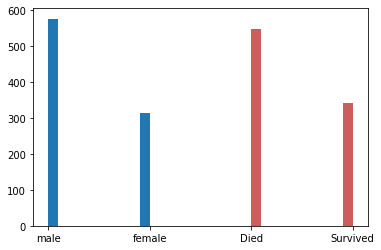

In [111]:
plt.hist(titanic_df['Sex'])
plt.hist(titanic_df['Status'],color='indianred')

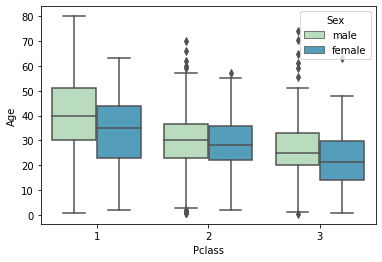

In [29]:
sns.boxplot(x='Pclass',y='Age',data=titanic_df,hue='Sex',palette='GnBu')

In [85]:
def age_func (passenger):
    age=passenger
    if age<16 :
        return 'Under age'
    
    else :
        return 'Adult'
titanic_df['Underage']=titanic_df['Age'].apply(age_func)
titanic_df['Status']=titanic_df.Survived.map({0:'Died',1:'Survived'})
cat_count=titanic_df.groupby(['Pclass','Sex','Underage','Status']).size().reset_index(name='counts')
cat_count

,Pclass,Sex,Underage,Status,counts
0,1,female,Adult,Died,2
1,1,female,Adult,Survived,89
2,1,female,Under age,Died,1
3,1,female,Under age,Survived,2
4,1,male,Adult,Died,77
5,1,male,Adult,Survived,42
6,1,male,Under age,Survived,3
7,2,female,Adult,Died,6
8,2,female,Adult,Survived,60
9,2,female,Under age,Survived,10


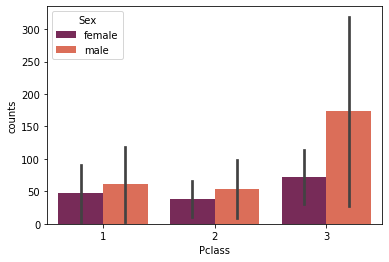

In [28]:
sns.barplot(x='Pclass',y='counts',data=cat_count,hue='Sex',palette='rocket')

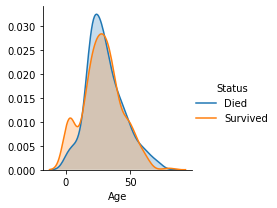

In [148]:
fig=sns.FacetGrid(titanic_df,hue='Status')
fig.map(sns.kdeplot,'Age',shade=True)

fig.add_legend()

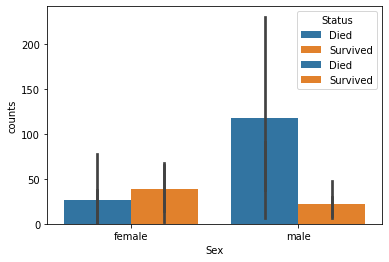

In [176]:
sns.barplot(x='Pclass',y='counts',data=cat_count,hue='Status')


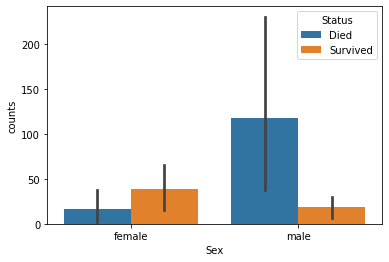

In [177]:
sns.barplot(x='Sex',y='counts',data=cat_count,hue='Status')